d:\0ilraypan\python_work\env\tensorflow=1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\0ilraypan\python_work\env\tensorflow=1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\0ilraypan\python_work\env\tensorflow=1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\0ilraypan\python_work\env\tensorflow=1.14\l

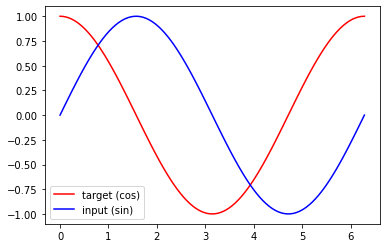

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


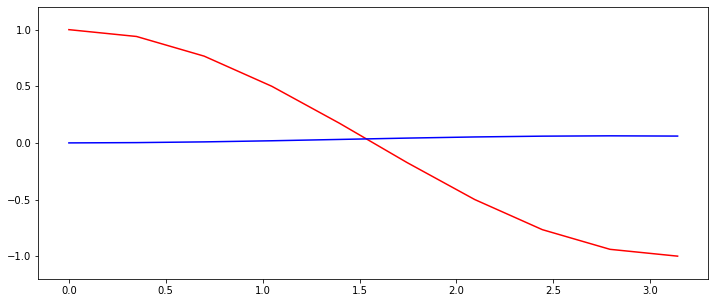

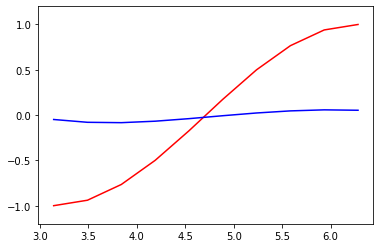

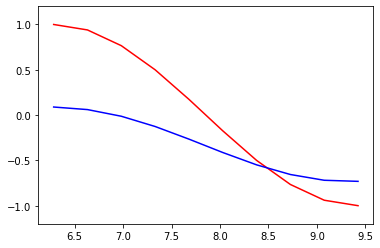

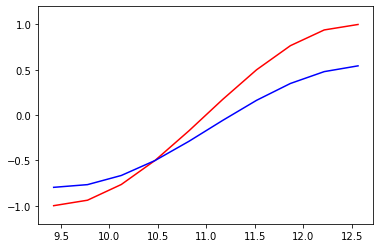

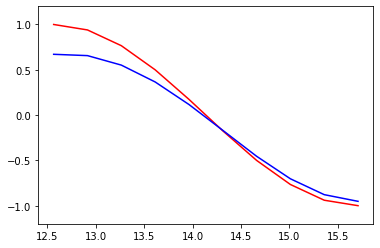

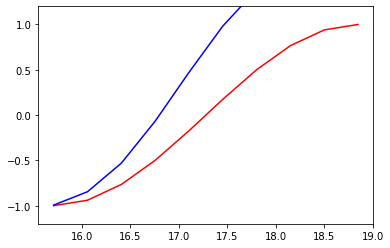

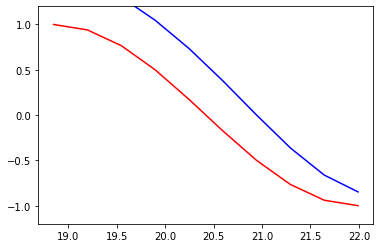

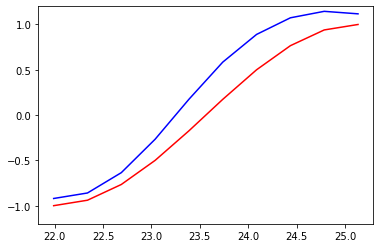

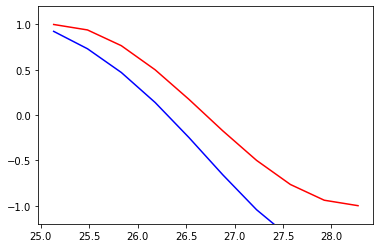

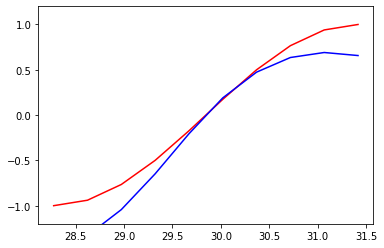

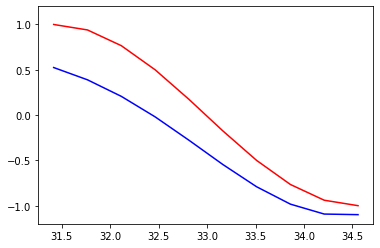

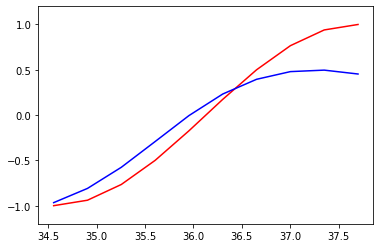

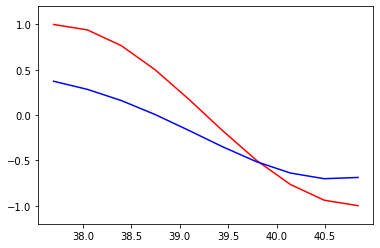

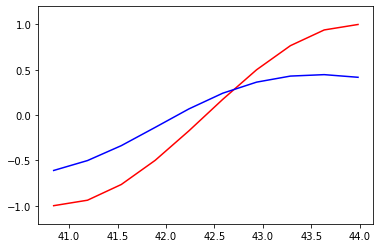

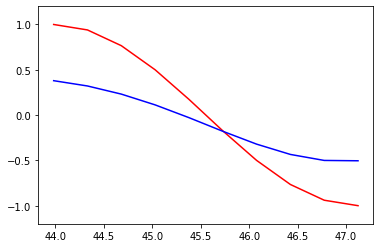

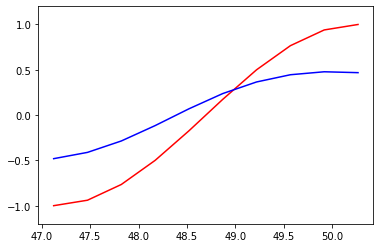

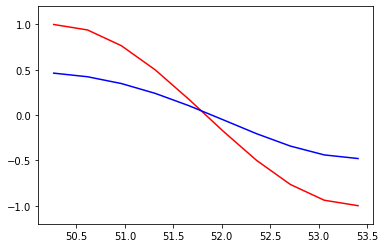

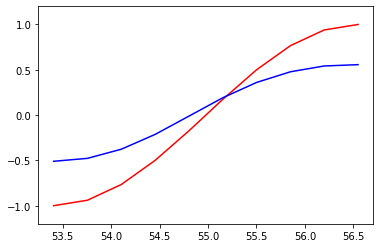

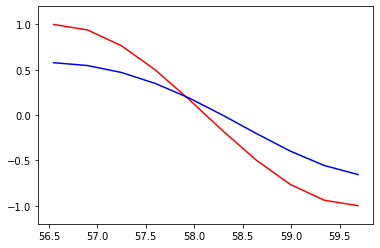

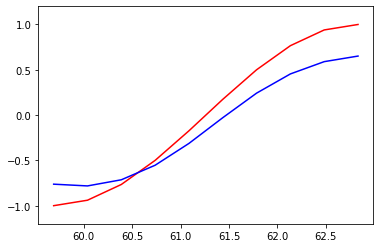

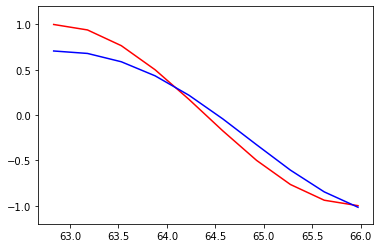

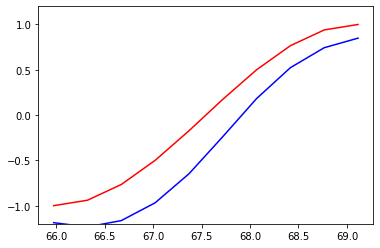

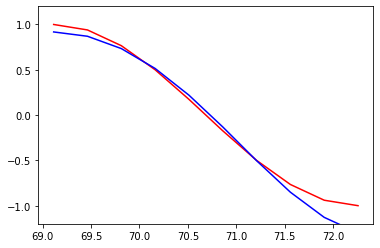

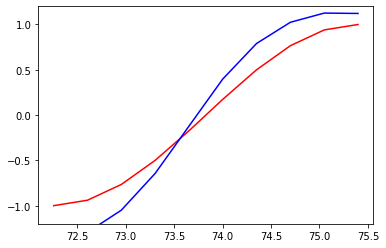

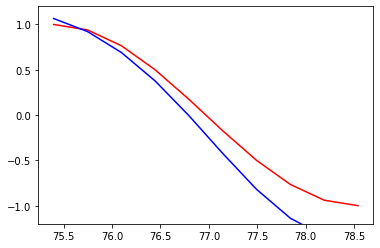

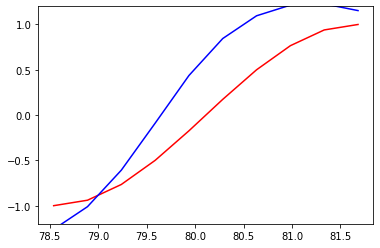

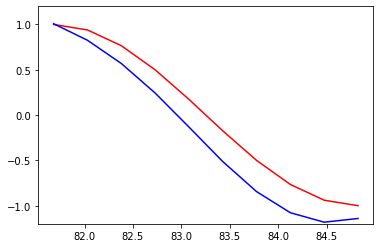

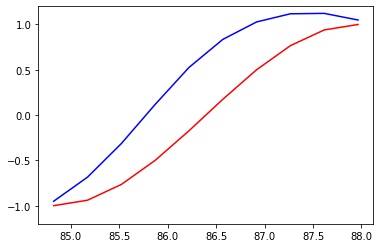

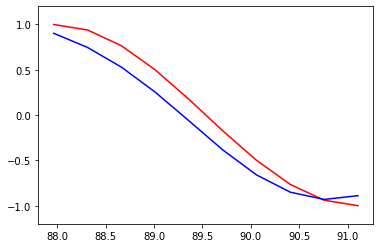

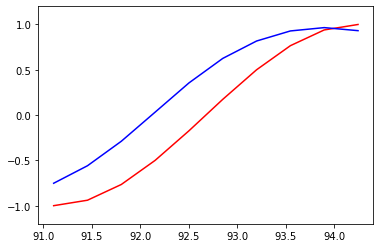

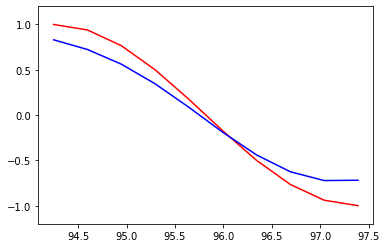

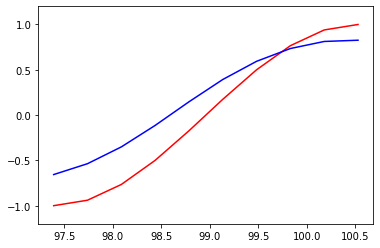

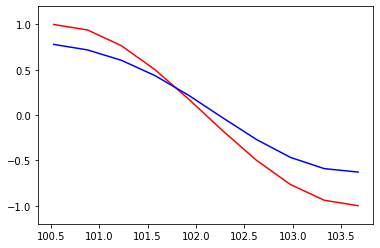

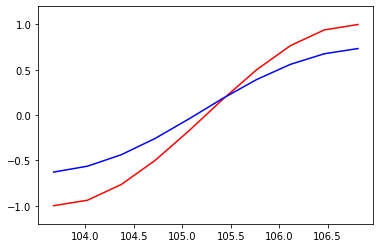

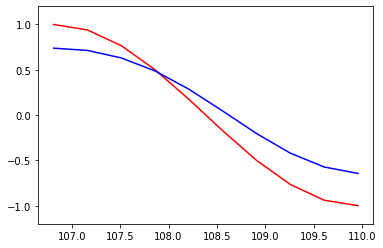

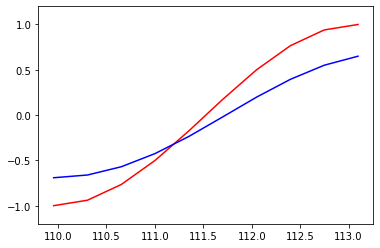

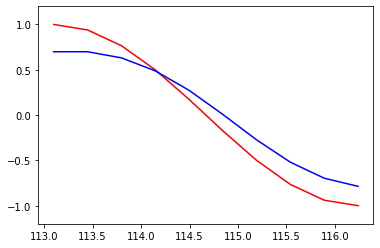

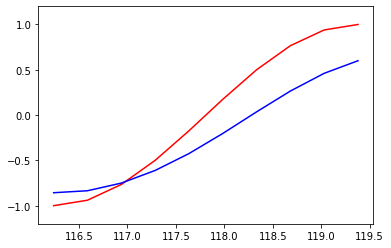

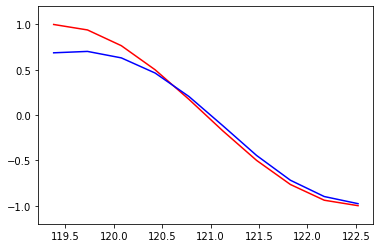

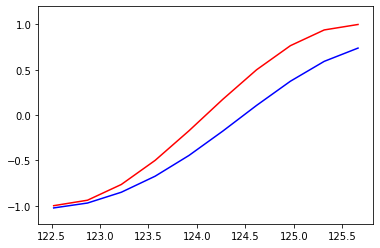

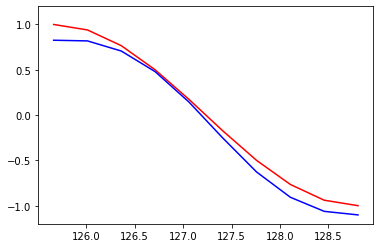

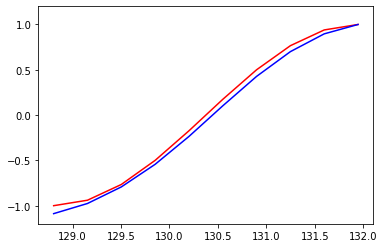

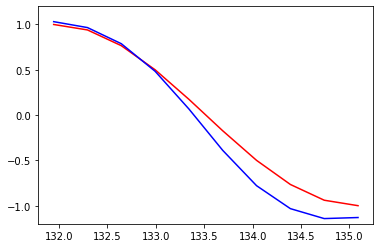

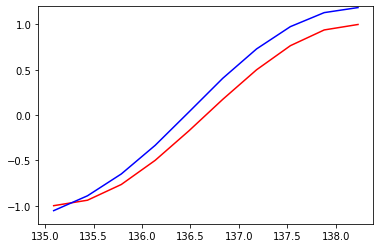

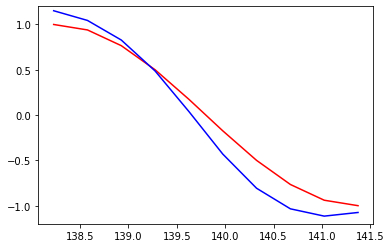

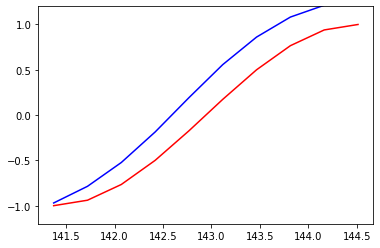

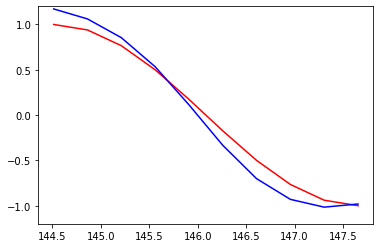

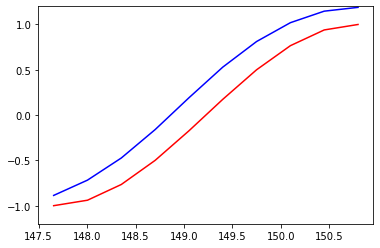

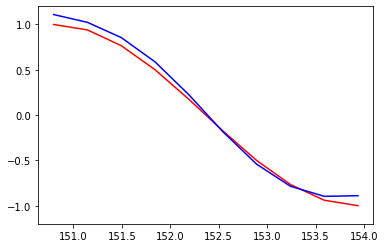

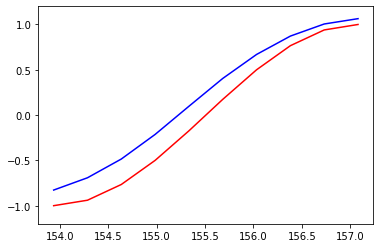

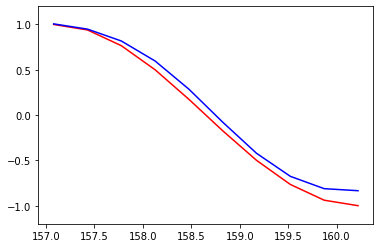

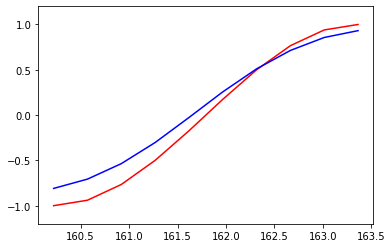

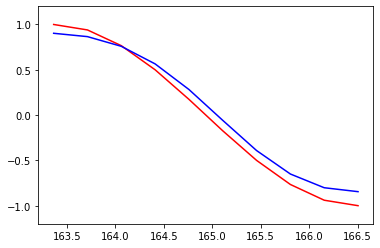

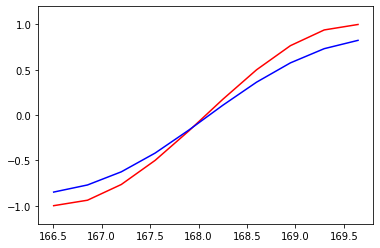

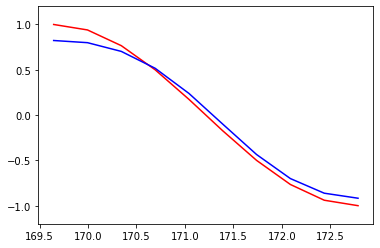

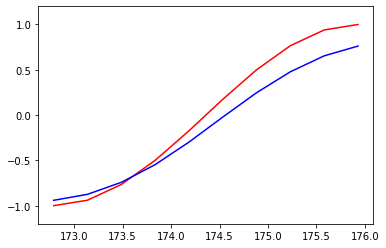

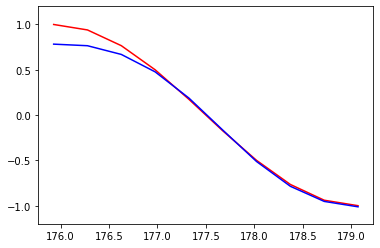

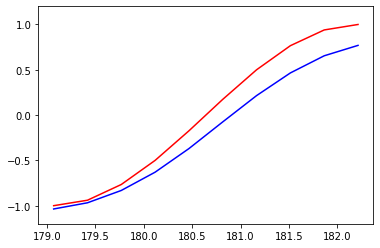

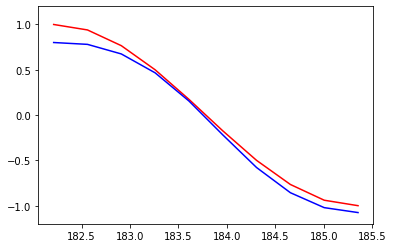

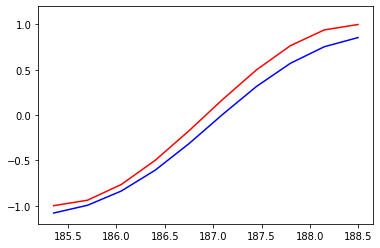

In [1]:
"""
Know more, visit my Python tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
tensorflow: 1.1.0
matplotlib
numpy
"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# Hyper Parameters
TIME_STEP = 10       # rnn time step
INPUT_SIZE = 1      # rnn input size
CELL_SIZE = 32      # rnn cell size
LR = 0.02           # learning rate

# show data
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps); y_np = np.cos(steps)    # float32 for converting torch FloatTensor
plt.plot(steps, y_np, 'r-', label='target (cos)'); plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best'); plt.show()

# tensorflow placeholders
tf_x = tf.placeholder(tf.float32, [None, TIME_STEP, INPUT_SIZE])        # shape(batch, 5, 1)
tf_y = tf.placeholder(tf.float32, [None, TIME_STEP, INPUT_SIZE])          # input y

# RNN
rnn_cell = tf.nn.rnn_cell.LSTMCell(num_units=CELL_SIZE)
init_s = rnn_cell.zero_state(batch_size=1, dtype=tf.float32)    # very first hidden state
outputs, final_s = tf.nn.dynamic_rnn(
    rnn_cell,                   # cell you have chosen
    tf_x,                       # input
    initial_state=init_s,       # the initial hidden state
    time_major=False,           # False: (batch, time step, input); True: (time step, batch, input)
)
outs2D = tf.reshape(outputs, [-1, CELL_SIZE])                       # reshape 3D output to 2D for fully connected layer
net_outs2D = tf.layers.dense(outs2D, INPUT_SIZE)
outs = tf.reshape(net_outs2D, [-1, TIME_STEP, INPUT_SIZE])          # reshape back to 3D

loss = tf.losses.mean_squared_error(labels=tf_y, predictions=outs)  # compute cost
train_op = tf.train.AdamOptimizer(LR).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())     # initialize var in graph

plt.figure(1, figsize=(12, 5)); plt.ion()       # continuously plot

for step in range(60):
    start, end = step * np.pi, (step+1)*np.pi   # time range
    # use sin predicts cos
    steps = np.linspace(start, end, TIME_STEP)
    x = np.sin(steps)[np.newaxis, :, np.newaxis]    # shape (batch, time_step, input_size)
    y = np.cos(steps)[np.newaxis, :, np.newaxis]
    if 'final_s_' not in globals():                 # first state, no any hidden state
        feed_dict = {tf_x: x, tf_y: y}
    else:                                           # has hidden state, so pass it to rnn
        feed_dict = {tf_x: x, tf_y: y, init_s: final_s_}
    _, pred_, final_s_ = sess.run([train_op, outs, final_s], feed_dict)     # train

    # plotting
    plt.plot(steps, y.flatten(), 'r-'); plt.plot(steps, pred_.flatten(), 'b-')
    plt.ylim((-1.2, 1.2)); plt.draw(); plt.pause(0.05)

plt.ioff(); plt.show()